In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(5,activation='softmax')(x) #final layer with softmax activation

C:\Users\MUICT\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [3]:
 model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [4]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [5]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('C:/Users/MUICT/Desktop/Project CNN/animals10/raw-img', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 373 images belonging to 5 classes.


In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 11 steps
Epoch 1/20
11/11 [==============================] - 22s 2s/step - loss: 1.3595 - accuracy: 0.6012
Epoch 2/20
11/11 [==============================] - 22s 2s/step - loss: 0.0687 - accuracy: 0.9824
Epoch 3/20
11/11 [==============================] - 24s 2s/step - loss: 0.0892 - accuracy: 0.9858
Epoch 4/20
11/11 [==============================] - 25s 2s/step - loss: 0.0804 - accuracy: 0.9736
Epoch 5/20
11/11 [==============================] - 25s 2s/step - loss: 0.1873 - accuracy: 0.9443
Epoch 6/20
11/11 [==============================] - 23s 2s/step - loss: 0.2336 - accuracy: 0.9443
Epoch 7/20
11/11 [==============================] - 22s 2s/step - loss: 0.1466 - accuracy: 0.9677
Epoch 8/20
11/11 [==============================] - 22s 2s/step - loss: 0.0419 - accuracy: 0.9853
Epoch 9/20
11/11 [==============================] - 22s 2s/step - loss: 0.0395 - accuracy: 0.988

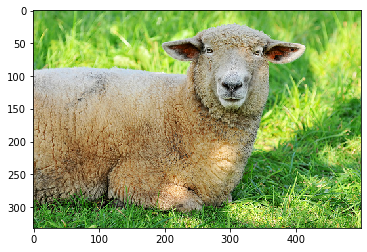

In [7]:
my_image = plt.imread("C:/Users/MUICT/Desktop/sheep21.jpg") #Read in the image (3, 14, 20)
img = plt.imshow(my_image)

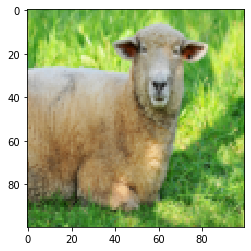

In [8]:
from skimage.transform import resize
my_image_resized = resize(my_image, (100,100,3)) #resize the image to 32x32 pixel with depth = 3
img = plt.imshow(my_image_resized) #show new image

In [9]:
import numpy as np
# probabilities = predict_on_batch(my_image_resized)
probabilities = model.predict(np.array( [my_image_resized,] ))

In [10]:
#Show the probability for each class
probabilities

array([[1.1179080e-20, 2.9861234e-13, 2.4425282e-12, 1.0000000e+00,
        1.6493658e-19]], dtype=float32)

In [11]:
number_to_class = ['butterfly','elephants','mucca','pecora','scoiattolo']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[4]], "-- Probability:", probabilities[0,index[4]])
print("Second most likely class:", number_to_class[index[3]], "-- Probability:", probabilities[0,index[3]])
print("Third most likely class:", number_to_class[index[2]], "-- Probability:", probabilities[0,index[2]])
print("Fourth most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])
print("Fifth most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])

Most likely class: pecora -- Probability: 1.0
Second most likely class: mucca -- Probability: 2.4425282e-12
Third most likely class: elephants -- Probability: 2.9861234e-13
Fourth most likely class: scoiattolo -- Probability: 1.6493658e-19
Fifth most likely class: butterfly -- Probability: 1.117908e-20
